<a href="https://colab.research.google.com/github/suuuuwimmer/study/blob/master/8_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 합성곱 신경망 만들기

전형적인 합성곱 신경망의 구조는 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산함.\
Sequential 클래스를 이용해 이 구조를 정의할 것
첫번째 합성곱 층인 Conv2D를 추가하고 add 함수를 통해 층을 계속 추가할 수 있음\
이 클래스는 다른 층 클래스와 마찬가지로 keras.layers 패키지 아래에 있음


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'))

매개변수를 볼때, 이 합성곱 층은 32개의 필터를 사용함, 커널의 크기는 (3,3)이고 렐루 활성화 함수와 세임 패딩을 사용함.

완전 연결 신경망에서처럼 케라스 신경망 모델의 첫 번째 층에 입력망을 추가해주어야하는데, 이미지를 (28,28,1)로 변경했기 때문에 입력층의 shape 매개변수에 (28,28,1)을 전달한다.

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 370,454 (1.41 MB)

 Trainable params: 370,454 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

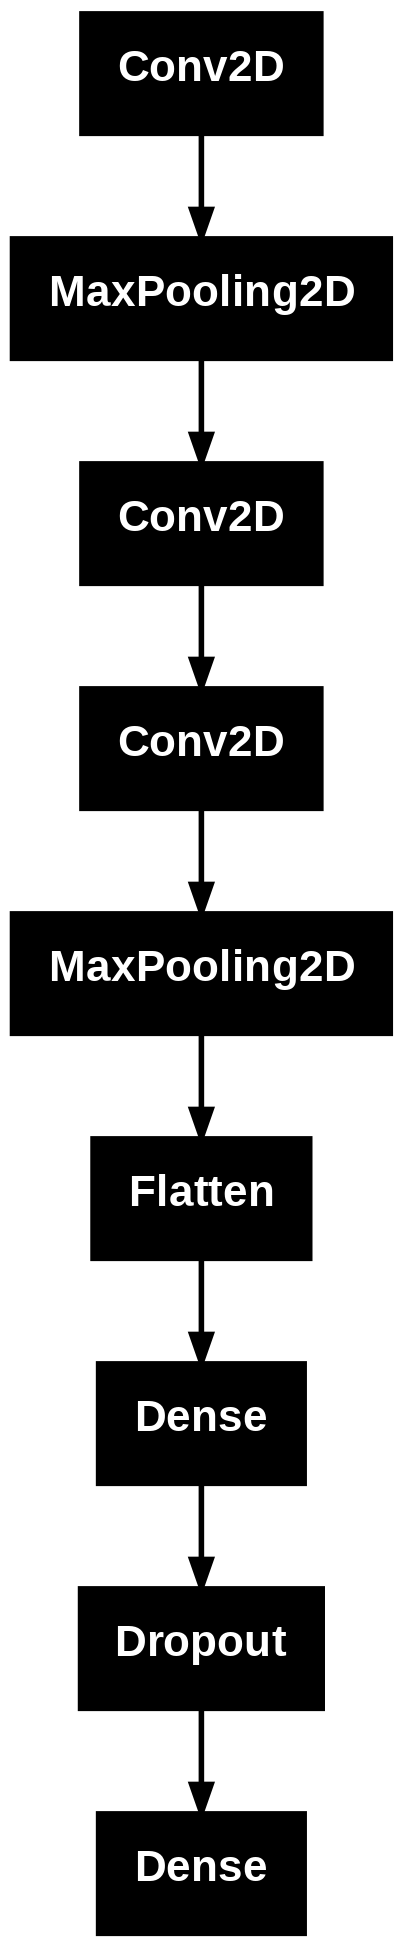

In [ ]:
keras.utils.plot_model(model)

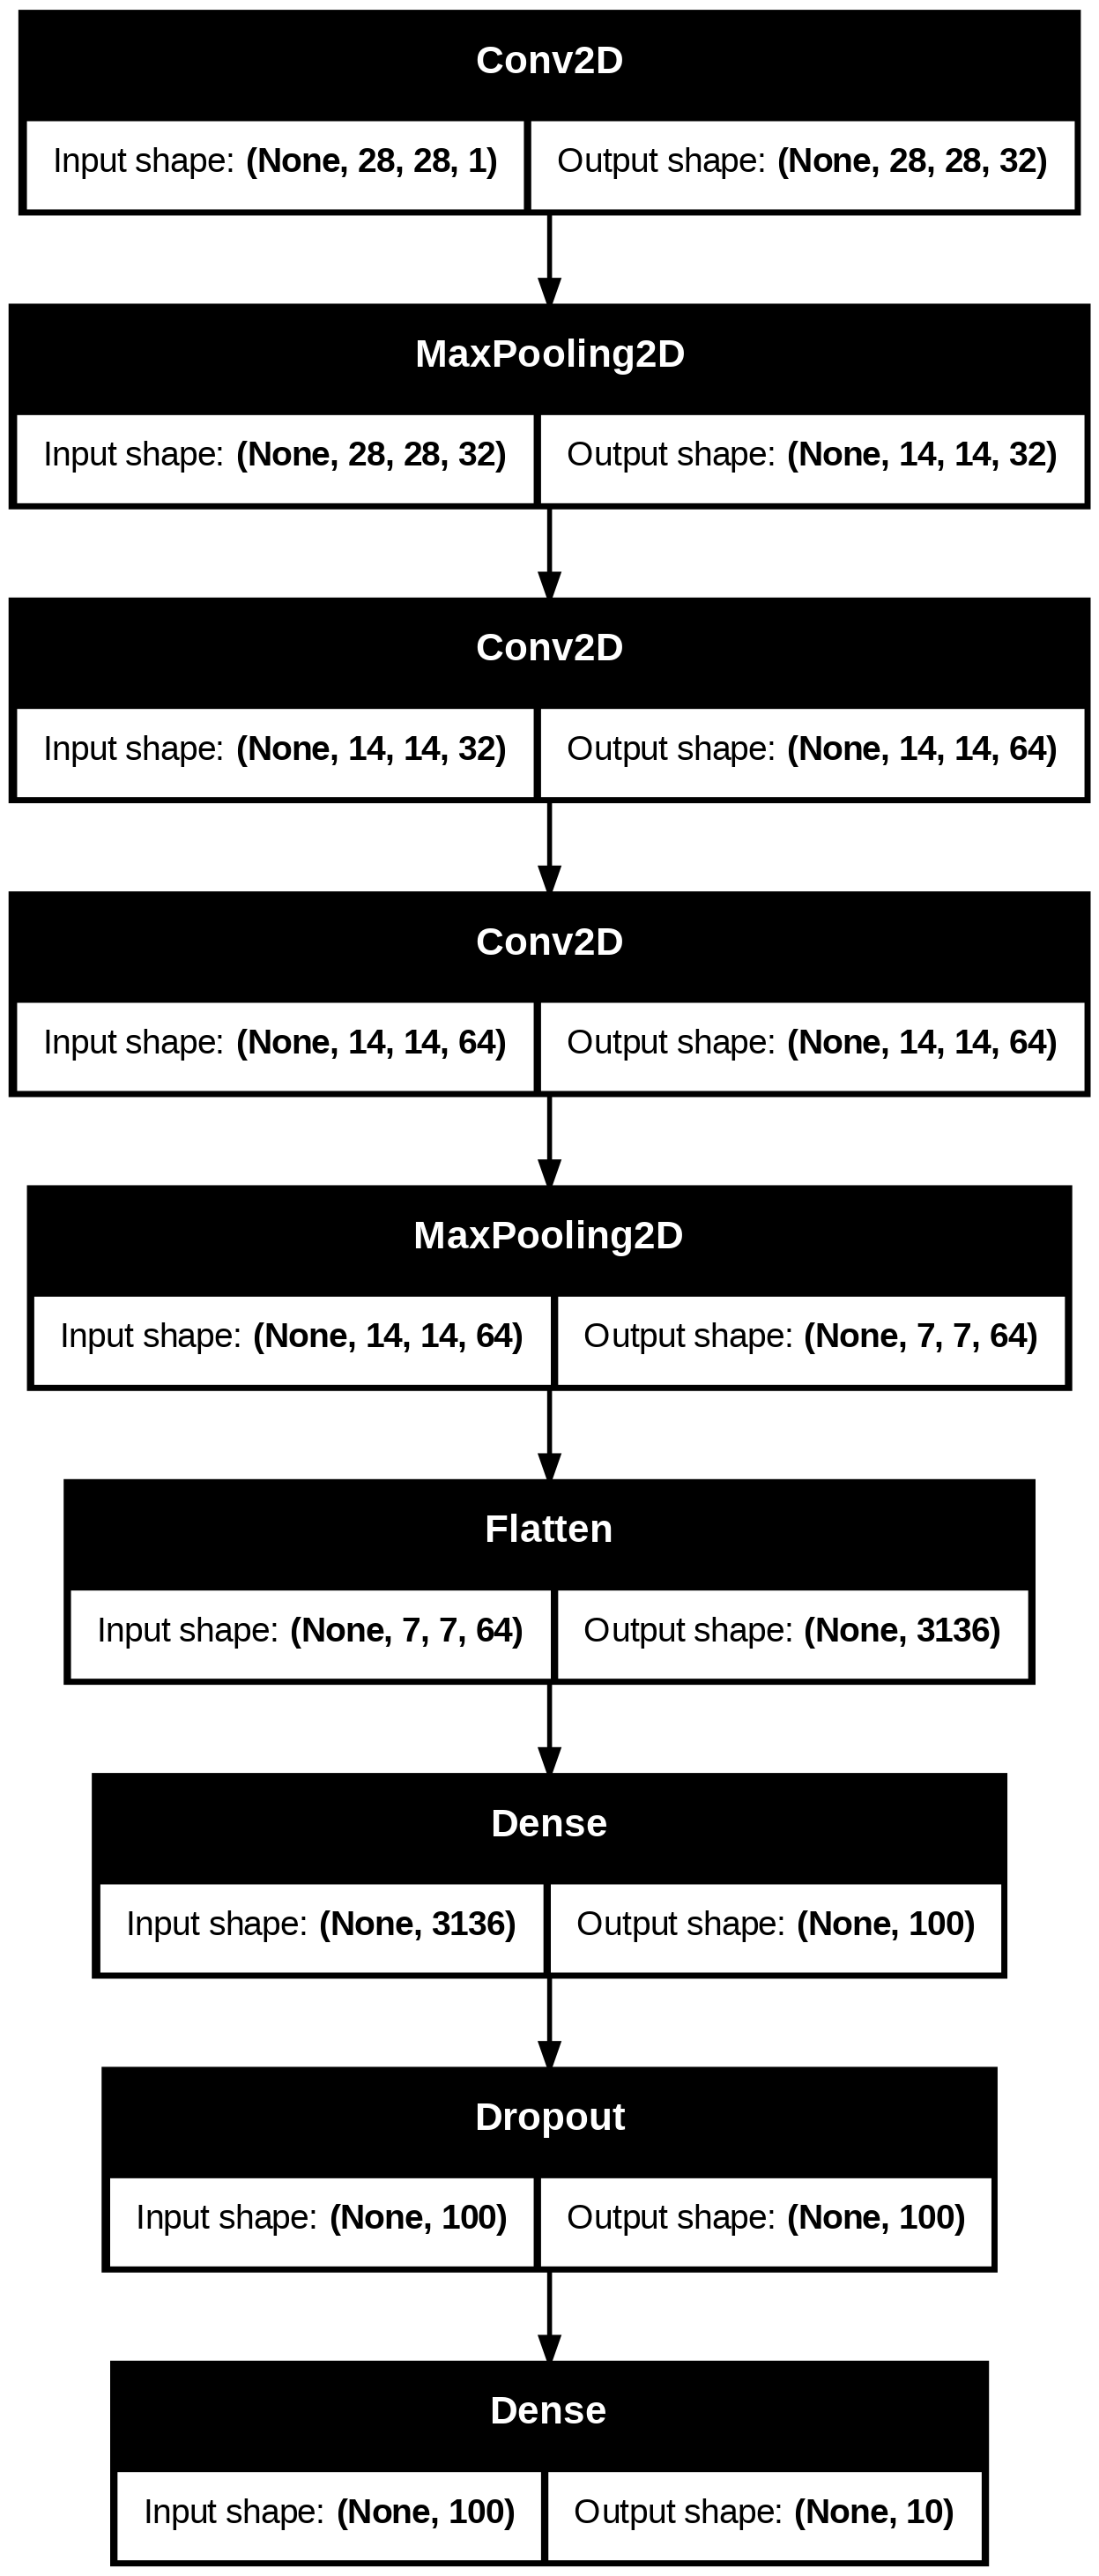

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

# 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 126s 83ms/step - accuracy: 0.7540 - loss: 0.6863 - val_accuracy: 0.8817 - val_loss: 0.3112
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 82ms/step - accuracy: 0.8829 - loss: 0.3258 - val_accuracy: 0.9067 - val_loss: 0.2531
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 121s 80ms/step - accuracy: 0.8995 - loss: 0.2799 - val_accuracy: 0.9109 - val_loss: 0.2440
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 124s 83ms/step - accuracy: 0.9136 - loss: 0.2350 - val_accuracy: 0.9191 - val_loss: 0.2203
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - accuracy: 0.9250 - loss: 0.2064 - val_accuracy: 0.9166 - val_loss: 0.2208
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 143s 82ms/step - accuracy: 0.9324 - loss: 0.1826 - val_accuracy: 0.9190 - val_loss: 0.2260


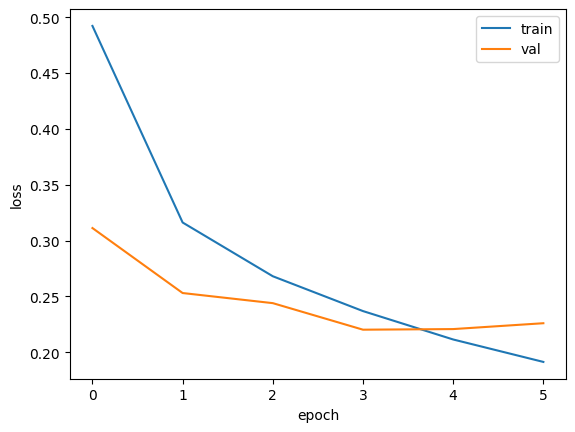

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9212 - loss: 0.2131


[0.22025582194328308, 0.9190833568572998]

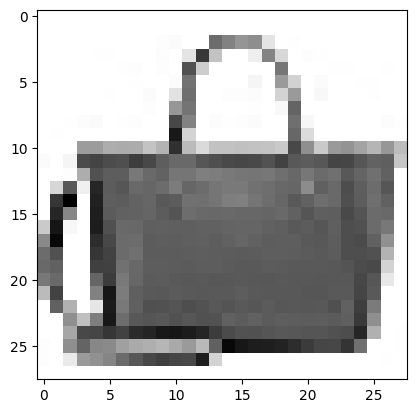

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
[[1.0881723e-11 3.5004596e-17 1.0215542e-13 1.4194926e-12 3.5979202e-14
  1.3441222e-13 6.4259105e-11 3.5417391e-15 1.0000000e+00 1.2750554e-13]]


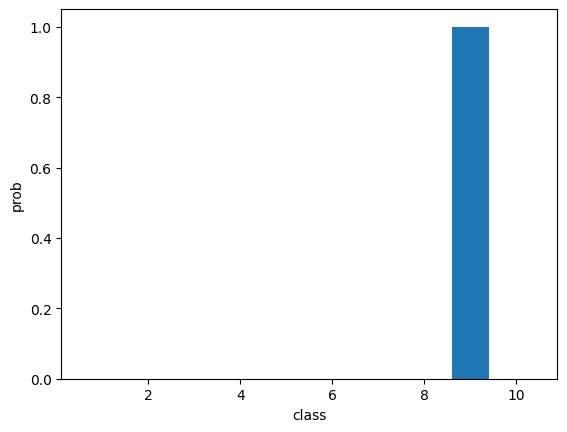

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [ ]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled=test_input.reshape(-1, 28,28,1)/255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9124 - loss: 0.2436


[0.2367866039276123, 0.9120000004768372]

# 가중치 시각화

In [25]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

In [26]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [28]:
conv=model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [29]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.033417318 0.1754644


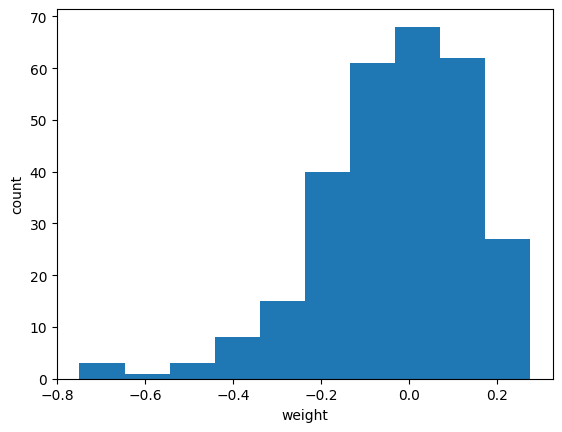

In [31]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

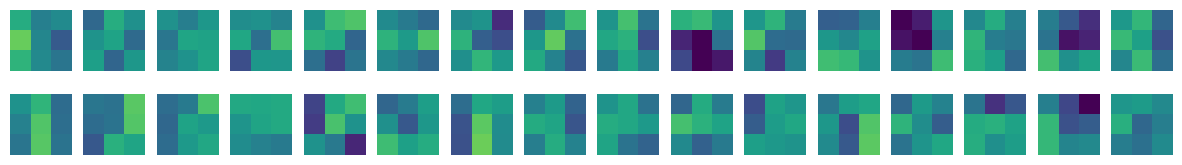

In [32]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,:,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [33]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'))

In [34]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [36]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0018138058 0.08270666


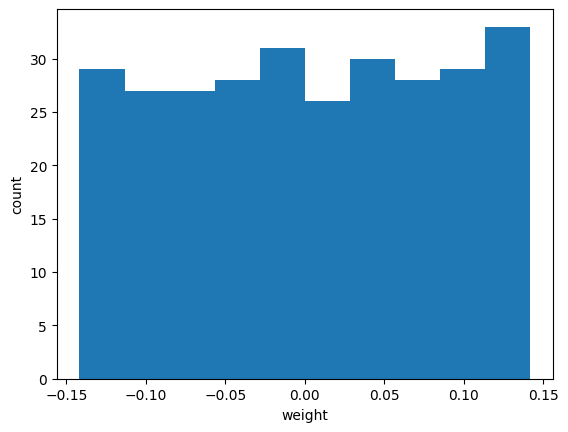

In [58]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

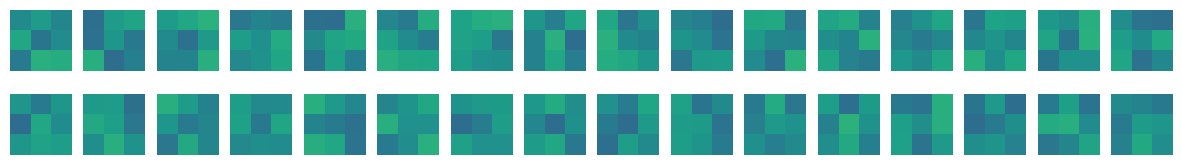

In [38]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,:,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [39]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')
hidden = dense1(inputs)

In [40]:
outputs = dense2(hidden)

In [41]:
func_model = keras.Model(inputs, outputs)

In [42]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [44]:
conv_acti = keras.Model(model.inputs,model.layers[0].output)

# 특정 맵 시각화

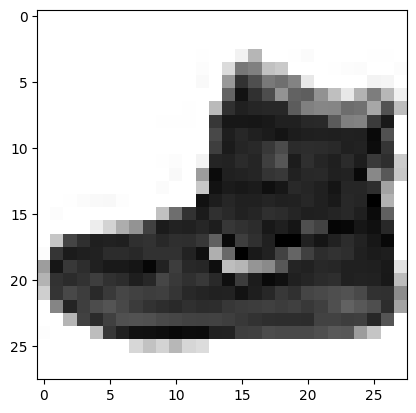

In [46]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [49]:
ankle_boot = train_input[0:1].reshape(-1, 28,28,1)/255.0
feature_maps=conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [50]:
print(feature_maps.shape)

(1, 28, 28, 32)


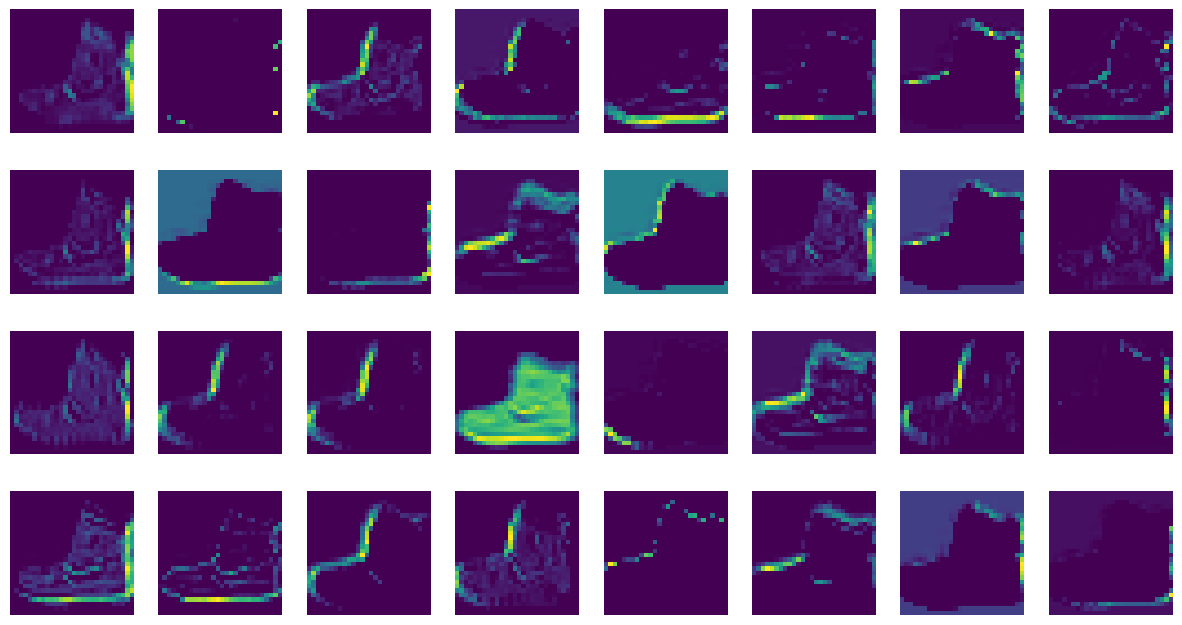

In [53]:
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [54]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)
feature_maps=conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [55]:
print(feature_maps.shape)

(1, 14, 14, 64)


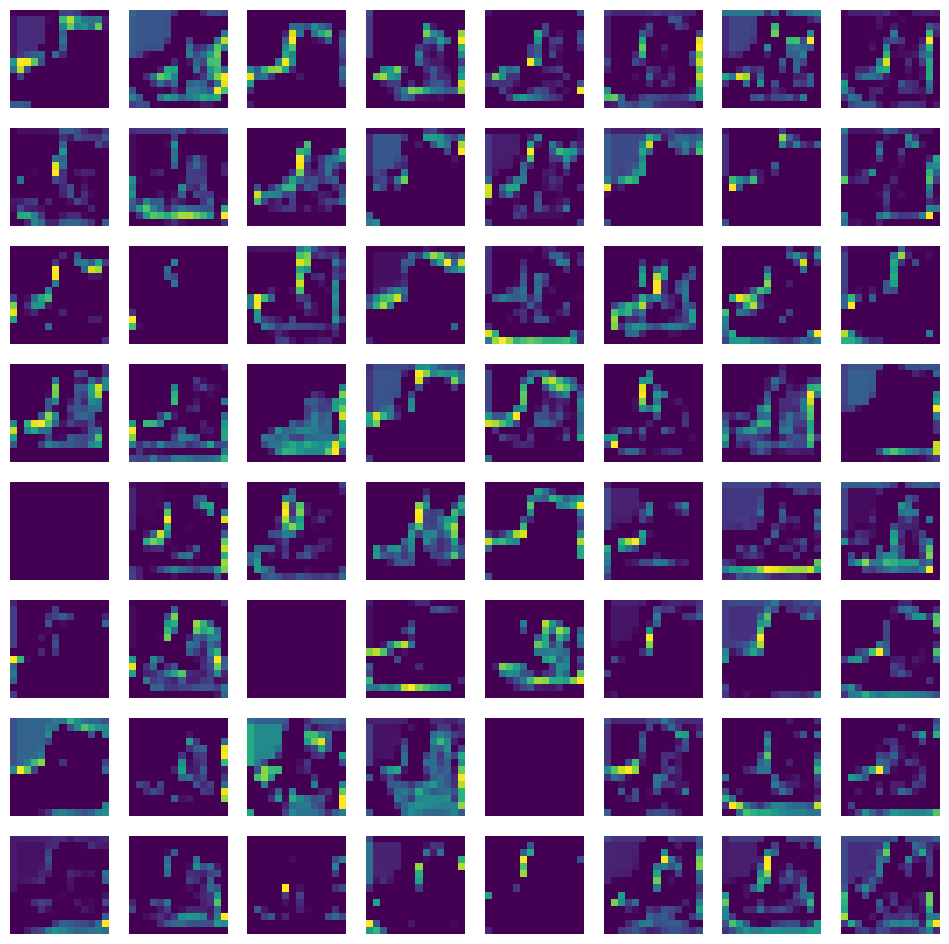

In [56]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()